In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', None)

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)[:200]

,date,United Kingdom,France,Belgium,Germany,Netherlands,Italy
0,2020-01-22,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0
2,2020-01-24,0,2,0,0,0,0
3,2020-01-25,0,3,0,0,0,0
4,2020-01-26,0,3,0,0,0,0
5,2020-01-27,0,3,0,1,0,0
6,2020-01-28,0,4,0,4,0,0
7,2020-01-29,0,5,0,4,0,0
8,2020-01-30,0,5,0,4,0,0
9,2020-01-31,2,5,0,5,0,2


# Simulative approach to calculate SIR curves

In [3]:
# beta/gamm is the reprodution number ----> means that 1 person can infect 4 persons (source:Media)
N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

# condition I0+S0+R0=N0
I0=df_analyse["Germany"][36]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0         
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [7]:
propagation_rates.head()

,susceptible,infected,recovered
0,999963.60027,33.79973,2.6
1,999950.080871,43.939156,5.979973
2,999932.506085,57.120026,10.373889
3,999909.659617,74.254492,16.085891
4,999879.960504,96.528156,23.51134


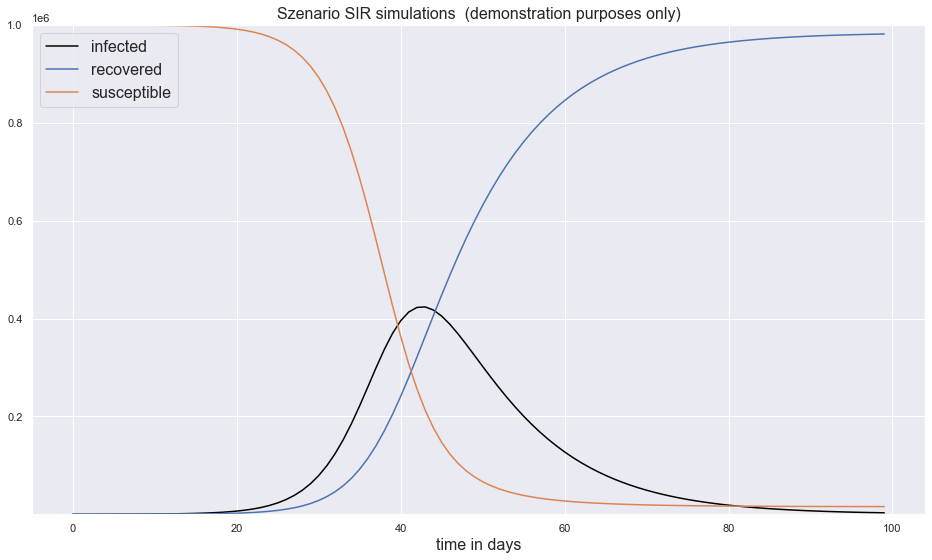

In [8]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='black')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [118]:
ydata = np.array(df_analyse["Germany"][36:150])
#b_data = np.array(df_analyse.Belgium[33:])
#f_data = np.array(df_analyse.France[33:])
t=np.arange(len(ydata))

In [119]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta
N0

1000000

In [120]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [121]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    # Integrate a system of ordinary differential equations.
    
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [122]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.60000000e+01, 3.50958833e+01, 4.73736173e+01, 6.39460322e+01,
       8.63149810e+01, 1.16507186e+02, 1.57257401e+02, 2.12255264e+02,
       2.86477810e+02, 3.86637040e+02, 5.21781736e+02, 7.04105580e+02,
       9.50030291e+02, 1.28165370e+03, 1.72867906e+03, 2.33097337e+03,
       3.14193788e+03, 4.23290849e+03, 5.69882838e+03, 7.66542947e+03,
       1.02980862e+04, 1.38123003e+04, 1.84853324e+04, 2.46676615e+04,
       3.27915252e+04, 4.33716018e+04, 5.69899646e+04, 7.42544087e+04,
       9.57179300e+04, 1.21751051e+05, 1.52372416e+05, 1.87068912e+05,
       2.24668112e+05, 2.63342617e+05, 3.00801497e+05, 3.34650499e+05,
       3.62815126e+05, 3.83880533e+05, 3.97242841e+05, 4.03057948e+05,
       4.02052506e+05, 3.95288042e+05, 3.83949420e+05, 3.69191858e+05,
       3.52050306e+05, 3.33398879e+05, 3.13943792e+05, 2.94235376e+05,
       2.74688842e+05, 2.55607446e+05, 2.37204550e+05, 2.19623028e+05,
       2.02951519e+05, 1.87237625e+05, 1.72498400e+05, 1.58728556e+05,
      

In [123]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata) 
#popt:array
#Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
perr = np.sqrt(np.diag(pcov))
#pcov2-D array
#The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
#To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\Viper\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00416113 0.00389309]  start infect: 26
Optimal parameters: beta = 0.21743618901077694  and gamma =  0.08442577733341865


In [124]:
# get the final fitted curve/ fit a function, f, to data.
fitted=fit_odeint(t, *popt)

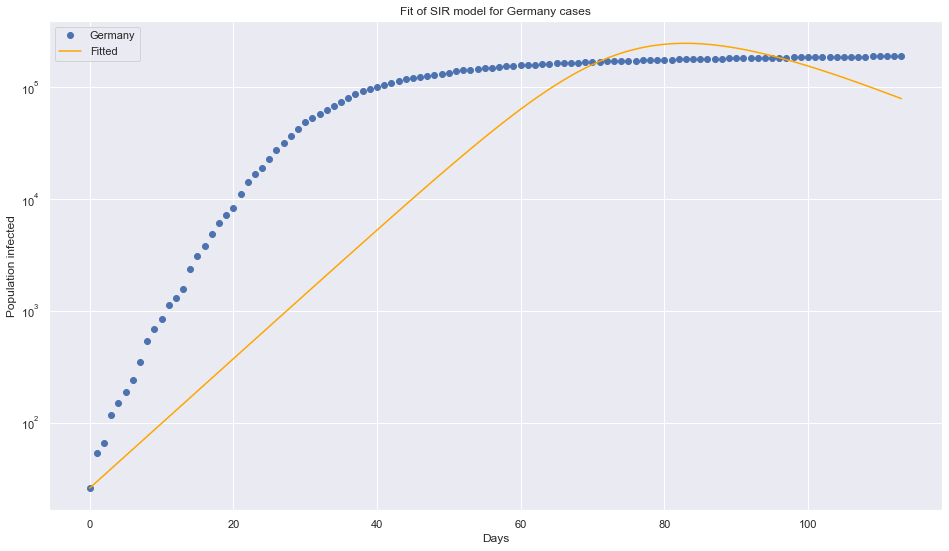

Optimal parameters: beta = 0.21743618901077694  and gamma =  0.08442577733341865
Basic Reproduction Number R0  2.575471566605383


In [125]:
plt.semilogy(t, ydata, 'o', label="Germany")
#plt.semilogy(t, b_data, 'o', label="Belgium")
#plt.semilogy(t, f_data, '*', label="France")
plt.semilogy(t, fitted, color= "orange", label="Fitted")
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend(loc="upper left")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

# Dynamic beta in SIR (infection rate)

In [135]:
t_initial=28
t_intro_measures=14
t_hold=28
t_relax=45

beta_max=0.4
beta_min=0.1
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [136]:
len(pd_beta)

115

In [137]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_9388\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

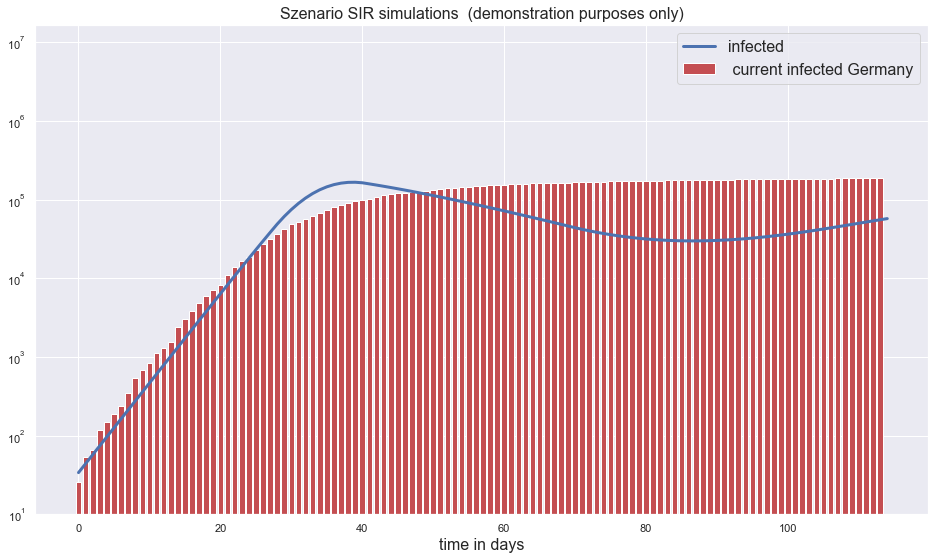

In [138]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)


t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')
#ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
#ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
#ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
#ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
#ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 100*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});